<a href="https://colab.research.google.com/github/arduinojinarendra/arduino/blob/main/impute_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [540]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [541]:
SEQ_LEN = 6

In [542]:
df = pd.read_csv(r'/content/Filtered_WindSpeed_Data.csv',index_col=0)
df

,WindSpeed
Unnamed: 0,
2019-01-01 00:00:00+00:00,6.057610
2019-01-01 00:10:00+00:00,6.112440
2019-01-01 00:20:00+00:00,6.138910
2019-01-01 00:30:00+00:00,5.917395
2019-01-01 00:40:00+00:00,5.971805
...,...
2020-03-30 23:10:00+00:00,3.533445
2020-03-30 23:20:00+00:00,3.261231
2020-03-30 23:30:00+00:00,3.331839


In [543]:
df.describe()

,WindSpeed
count,59458.000000
mean,5.852754
std,2.560121
min,0.900000
25%,3.843526
50%,5.575158
75%,7.477427
max,22.970893


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65520 entries, 2019-01-01 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WindSpeed  59458 non-null  float64
dtypes: float64(1)
memory usage: 1023.8+ KB


In [545]:
65520-59458

6062

In [546]:
imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(df)


In [547]:
np.isnan(data).any()

False

In [548]:
data = np.mean(data.reshape(-1, 6*4), -1)

In [549]:
scaler=MinMaxScaler()

In [550]:
data = np.expand_dims(data, -1)

In [551]:
data = scaler.fit_transform(data)

In [552]:
data.shape

(2730, 1)

In [553]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:(i + seq_len)])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)


In [554]:
x, y = create_sequences(data, SEQ_LEN)

In [555]:
x.shape

(2724, 6, 1)

In [556]:
y.shape

(2724, 1)

In [557]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1729)

In [558]:
y_train.shape[0]

2179

In [559]:
y_val.shape[0]

545

In [560]:
model = tf.keras.models.Sequential([
    Input(x.shape[1:]),
    LSTM(units=32, activation='relu', input_shape=(6, 1)),

    Dense(units=1)
])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 32)                4352      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [561]:
model.compile(loss="mse", optimizer='adam')

In [562]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
69/69 [==============================] - 3s 13ms/step - loss: 0.0299 - val_loss: 0.0108
Epoch 2/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 3/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 4/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 5/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 6/10
69/69 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 7/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 8/10
69/69 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 9/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 10/10
69/69 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0055


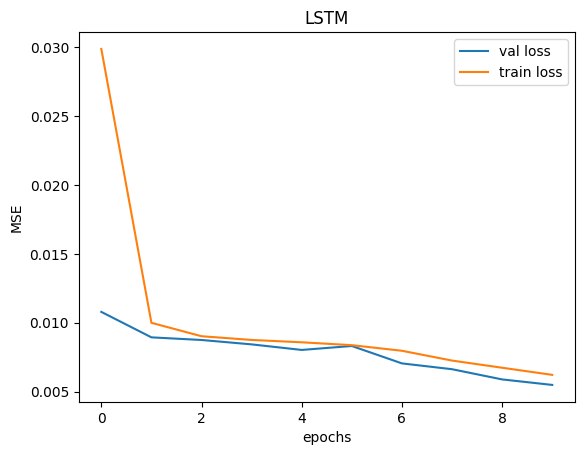

In [563]:
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('LSTM')
plt.legend()
plt.show()

In [564]:
data.shape

(2730, 1)

In [565]:
y_pred = model(x)

In [566]:
y_pred.shape

TensorShape([2724, 1])

In [567]:
y.shape

(2724, 1)

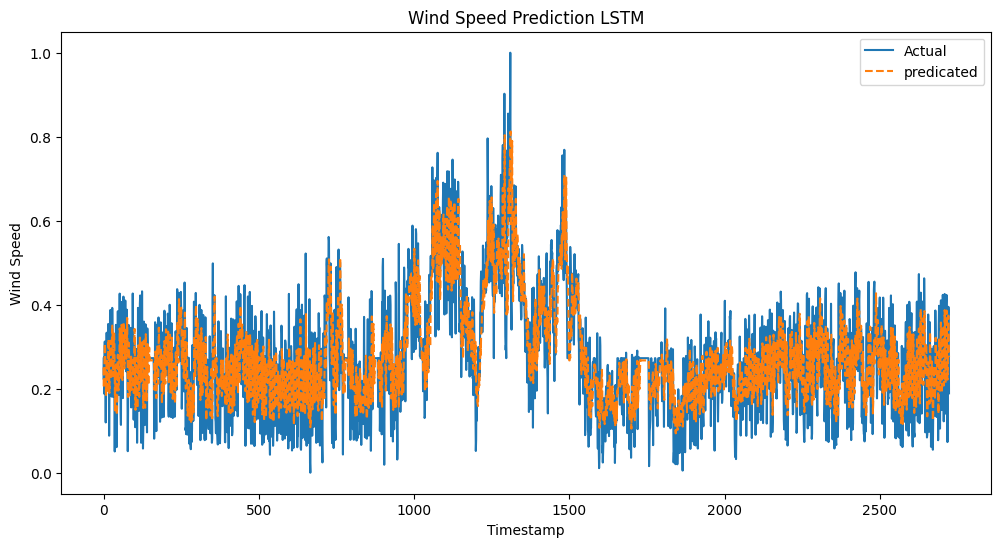

In [568]:
plt.figure(figsize=(12, 6))
plt.plot(y, label="Actual")
plt.plot(y_pred, "--", label="predicated")

plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction LSTM')
plt.show()

In [569]:
y_pred_train = model(x_train)
y_pred_val = model(x_val)

In [570]:
mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
print(mse_train)
print(mse_val)

0.005971505125940144
0.005486189144488535


In [571]:
mae_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)
mae_val = mean_absolute_error(y_pred=y_pred_val, y_true=y_val)
mape_train=mean_absolute_percentage_error(y_pred=y_pred_train,y_true=y_train)
mape_val=mean_absolute_percentage_error(y_pred=y_pred_val, y_true=y_val)
print(mae_train)
print(mae_val)
print(mape_train)
print(mape_val)


0.06014785143332075
0.056896411819393165
224035119769.80215
0.3184120720284858


In [572]:
r2_train=r2_score(y_pred=y_pred_train,y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(r2_train)
print(r2_val)

0.6883191658450183
0.7171828978388359


In [573]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(32, input_shape=(6, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')



In [574]:
model_rnn.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [575]:
history = model_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
69/69 [==============================] - 2s 7ms/step - loss: 0.0096 - val_loss: 0.0064
Epoch 2/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 4/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 5/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 6/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 8/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 9/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0053


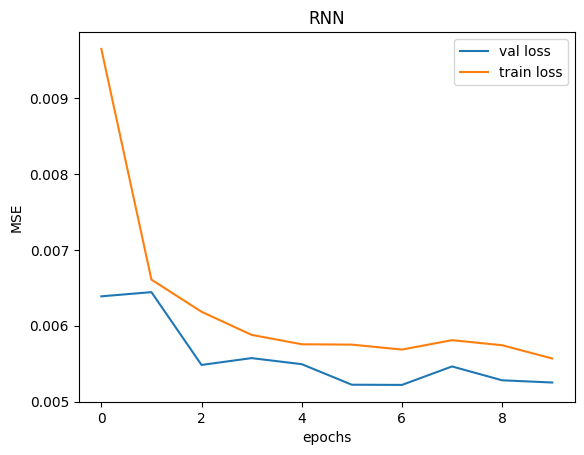

In [576]:
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('RNN')
plt.legend()
plt.show()

In [577]:
y_pred = model_rnn(x)

In [578]:
y_pred.shape

TensorShape([2724, 1])

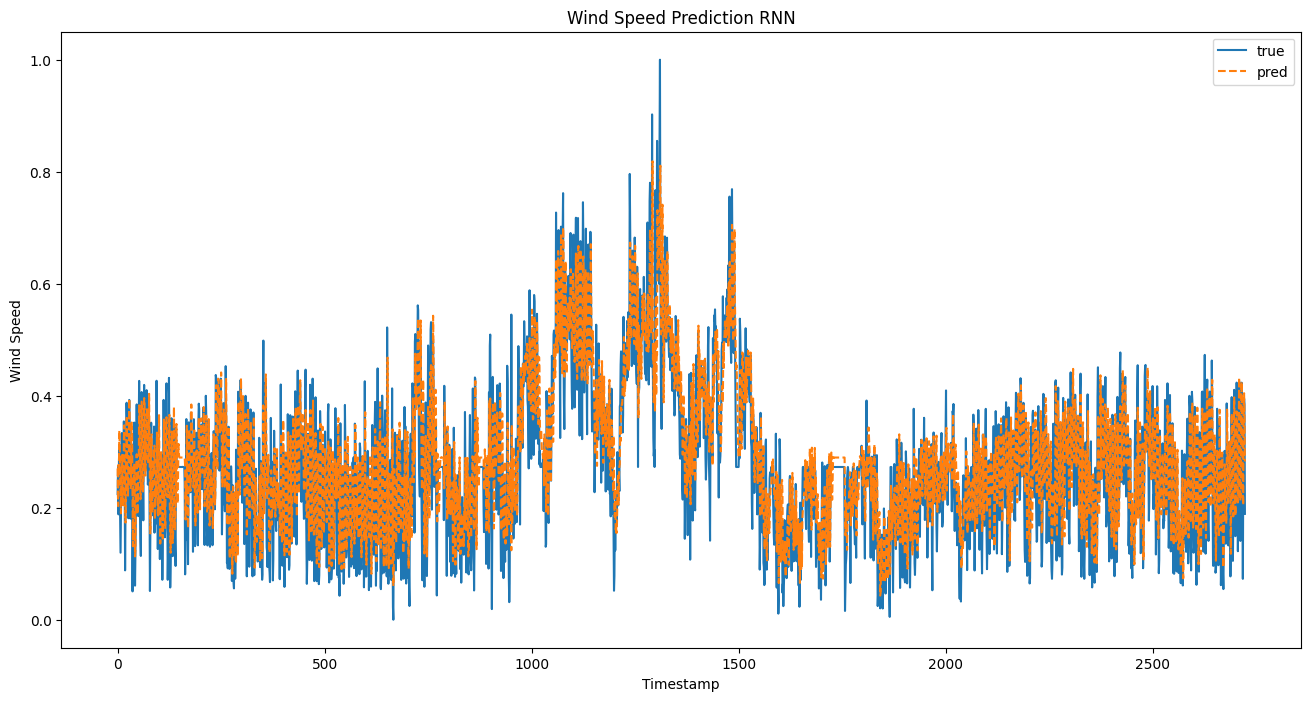

In [579]:
plt.figure(figsize=(16, 8))
plt.plot(y, label="true")
plt.plot(y_pred, "--", label="pred")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Prediction RNN')
plt.legend()
plt.savefig("timeseries-mean.png")
plt.show()

In [580]:
y_pred_train = model_rnn(x_train)
y_pred_val = model_rnn(x_val)
mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
print(mse_train)
print(mse_val)
r2_train=r2_score(y_pred=y_pred_train,y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(r2_train)
print(r2_val)
mae_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)
mae_val = mean_absolute_error(y_pred=y_pred_val, y_true=y_val)
print(mae_train)
print(mae_val)

0.005755230991268548
0.005252263623468655
0.6996075263636701
0.7292419312104514
0.05910161743264602
0.055216646441917684


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 1s 5ms/step - loss: 0.0231 - val_loss: 0.0090
Epoch 2/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0072
Epoch 3/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 4/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 5/10
69/69 [=======

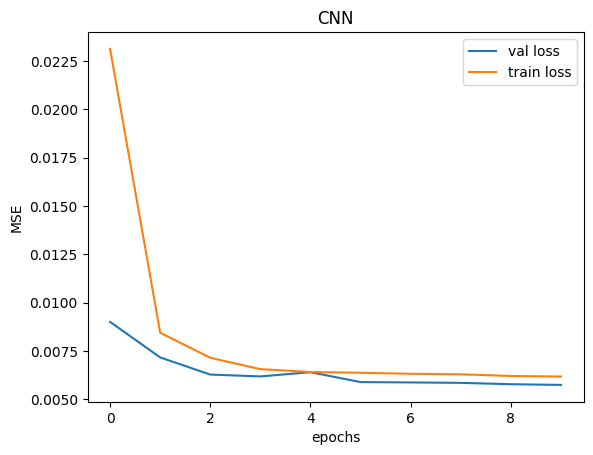

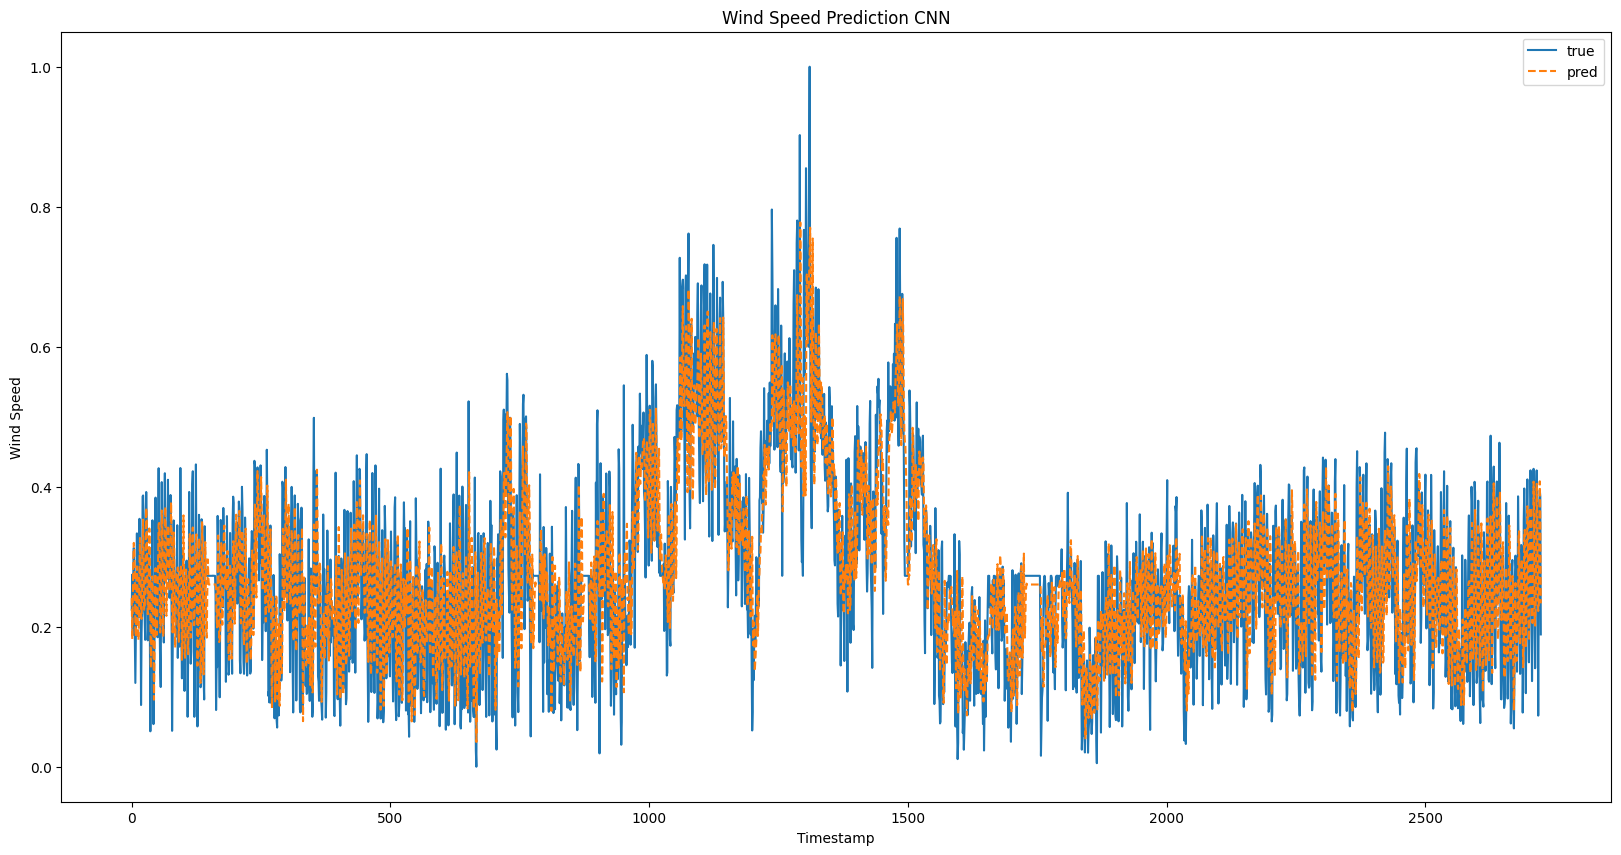

0.6830047250844467
0.704256137458749
0.006073324701498257
0.00573694715002889
0.060154968876826725
0.057461499594886514


In [581]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()
history = model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('CNN')
plt.legend()
plt.show()
y_pred = model_cnn(x)
plt.figure(figsize=(20, 10))
plt.plot(y, label="true")
plt.plot(y_pred, "--", label="pred")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Prediction CNN')
plt.legend()
plt.savefig("timeseries-mean.png")
plt.show()
y_pred_train = model_cnn(x_train)
y_pred_val = model_cnn(x_val)
mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
r2_train=r2_score(y_pred=y_pred_train,y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(r2_train)
print(r2_val)
print(mse_train)
print(mse_val)
mae_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)
mae_val = mean_absolute_error(y_pred=y_pred_val, y_true=y_val)
print(mae_train)
print(mae_val)

##########################

In [582]:
x_train = tf.squeeze(x_train)
x_train.shape

TensorShape([2179, 6])

In [583]:
!pip install cleanlab
model_an = tf.keras.models.Sequential()
model_an.add(Dense(32, activation='relu', input_shape=(6,)))
model_an.add(Dense(16, activation='relu'))
model_an.add(Dense(8, activation='relu'))
model_an.add(Dense(16, activation='relu'))
model_an.add(Dense(32, activation='relu'))
model_an.add(Dense(1, activation='relu'))



In [584]:
model_an.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                224       
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 dense_80 (Dense)            (None, 8)                 136       
                                                                 
 dense_81 (Dense)            (None, 16)                144       
                                                                 
 dense_82 (Dense)            (None, 32)                544       
                                                                 
 dense_83 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1609 (6.29 KB)
Trainable params: 1609 (

In [585]:
model_an.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='mse')
history = model_an.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 2/20
69/69 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 3/20
69/69 [==============================] - 1s 10ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 4/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 5/20
69/69 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 6/20
69/69 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 7/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 8/20
69/69 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 9/20
69/69 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 10/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0934 - val_loss: 0.0944
Epoch 11/20
69/69 

In [586]:
y_pred_an =model_an.predict(x)

86/86 [==============================] - 0s 1ms/step


In [587]:
mse_an = mean_squared_error(y, y_pred_an)

In [588]:
mse_an

0.09360797899079289

In [589]:
y_org = scaler.inverse_transform(y)


In [590]:
y_pred_org = scaler.inverse_transform(y_pred_an)

In [591]:

reconstruction_error = np.mean(np.square(y - y_pred_an), axis=1)


In [592]:
reconstruction_error.shape

(2724,)

In [593]:
max(reconstruction_error)

1.0

In [594]:
min(reconstruction_error)

0.0

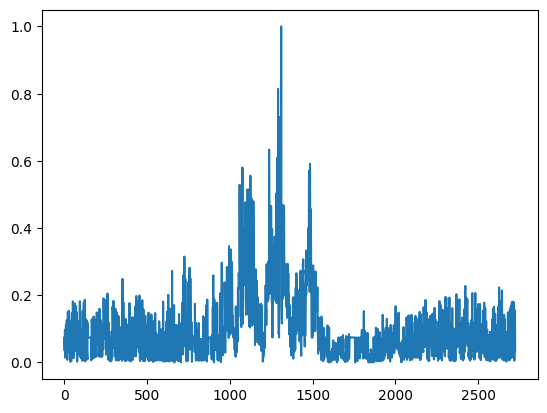

In [595]:
plt.plot(reconstruction_error)

In [596]:
threshold = 0.1  # You can adjust this threshold based on your data and requirements


In [597]:
x.shape

(2724, 6, 1)

In [598]:
anomalies_ids = reconstruction_error > threshold

In [599]:
an = np.where(anomalies_ids)[0]

In [600]:
df.mean(axis=0)

WindSpeed    5.852754
dtype: float64

In [601]:
data = scaler.inverse_transform(data)

In [602]:
data[an+6]

array([[ 6.82525438],
       [ 7.15878323],
       [ 7.67030224],
       [ 7.69462647],
       [ 7.01854961],
       [ 7.12449826],
       [ 7.77349162],
       [ 7.22198122],
       [ 7.12517242],
       [ 7.64471301],
       [ 7.19757115],
       [ 8.31874544],
       [ 6.75487116],
       [ 6.64167553],
       [ 7.99989926],
       [ 6.76827012],
       [ 7.08307078],
       [ 8.20347403],
       [ 6.60074144],
       [ 8.05374774],
       [ 7.7044346 ],
       [ 6.59652372],
       [ 7.12179947],
       [ 7.01184504],
       [ 8.32317657],
       [ 7.77426467],
       [ 7.9459198 ],
       [ 8.24914076],
       [ 8.40576735],
       [ 7.24981035],
       [ 7.14932485],
       [ 7.03617147],
       [ 6.9892353 ],
       [ 7.2252691 ],
       [ 7.13218549],
       [ 6.96162422],
       [ 7.40732499],
       [ 7.22148403],
       [ 6.83431087],
       [ 7.06537662],
       [ 7.66616707],
       [ 7.51922524],
       [ 6.55675123],
       [ 7.07095476],
       [ 7.5547498 ],
       [ 7

In [603]:
np.mean(data)

5.8527537777685295

In [604]:
data[an+6] = np.mean(data)

In [605]:
data[an+6]

array([[5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.85275378],
       [5.852

In [606]:
new_df = pd.DataFrame(data, columns=["Wind speed"])

In [607]:
new_df

,Wind speed
0,4.949980
1,4.249077
2,4.167145
3,6.033404
4,7.195552
...,...
2725,5.559679
2726,5.852754
2727,5.852754
2728,5.852754


In [608]:

new_df.to_csv("vamsi1_new.csv", index=None)

In [609]:
model = tf.keras.models.Sequential([
    Input(x.shape[1:]),
    LSTM(units=32, activation='relu', input_shape=(6, 1)),

    Dense(units=1)
])
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 32)                4352      
                                                                 
 dense_84 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [610]:
model.compile(loss="mse", optimizer='adam')

In [611]:
scl = MinMaxScaler()
data = scl.fit_transform(new_df.values)

In [612]:
x, y = create_sequences(data, SEQ_LEN)

In [613]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=40)

In [614]:
history = model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/40
52/52 [==============================] - 2s 15ms/step - loss: 0.0880 - val_loss: 0.0300
Epoch 2/40
52/52 [==============================] - 1s 10ms/step - loss: 0.0315 - val_loss: 0.0291
Epoch 3/40
52/52 [==============================] - 0s 6ms/step - loss: 0.0298 - val_loss: 0.0272
Epoch 4/40
52/52 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.0248
Epoch 5/40
52/52 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: 0.0227
Epoch 6/40
52/52 [==============================] - 0s 6ms/step - loss: 0.0241 - val_loss: 0.0212
Epoch 7/40
52/52 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.0202
Epoch 8/40
52/52 [==============================] - 0s 8ms/step - loss: 0.0218 - val_loss: 0.0212
Epoch 9/40
52/52 [==============================] - 0s 8ms/step - loss: 0.0225 - val_loss: 0.0194
Epoch 10/40
52/52 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0195
Epoch 11/40
52/52

0.020209874810387177
0.01885087752664263
0.4999031745052752
0.5081422100570852
0.10761124861824528
0.1031419203867617


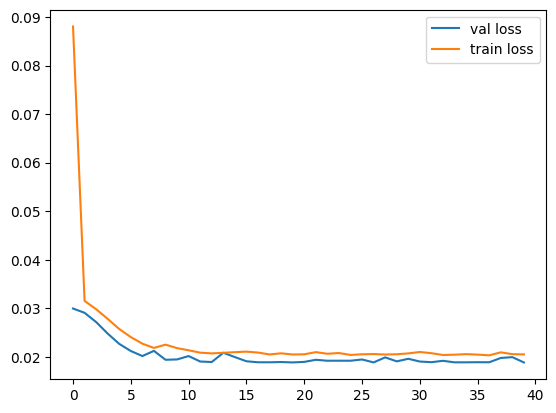

In [615]:
y_pred_train = model(x_train)
y_pred_val = model(x_val)

mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
r2_train=r2_score(y_pred=y_pred_train, y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(mse_train)
print(mse_val)
print(r2_train)
print(r2_val)
mae_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)
mae_val = mean_absolute_error(y_pred=y_pred_val, y_true=y_val)
print(mae_train)
print(mae_val)
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.legend()
plt.show()

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(32, input_shape=(6, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()
history = model_rnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.legend()
plt.show()
y_pred = model_rnn(x)
plt.figure(figsize=(20, 10))
plt.plot(y, label="true")
plt.plot(y_pred, "--", label="pred")
plt.legend()
plt.savefig("timeseries-mean.png")
plt.show()
y_pred_train = model_rnn(x_train)
y_pred_val = model_rnn(x_val)
mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
r2_train=r2_score(y_pred=y_pred_train, y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(mse_train)
print(mse_val)
print(r2_train)
print(r2_val)
mae_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)
mae_val = mean_absolute_error(y_pred=y_pred_val, y_true=y_val)
print(mae_train)
print(mae_val)


Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_85 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
52/52 [==============================] - 6s 22ms/step - loss: 0.1236 - val_loss: 0.0560
Epoch 2/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0520 - val_loss: 0.0440
Epoch 3/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0435 - val_loss: 0.0376
Epoch 4/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0379 - val_loss: 0.0330
Epoch 5/20
52/52 [===

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(6, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()
history = model_cnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.legend()
plt.show()
y_pred = model_cnn(x)
plt.figure(figsize=(20, 10))
plt.plot(y, label="true")
plt.plot(y_pred, "--", label="pred")
plt.legend()
plt.savefig("timeseries-mean.png")
plt.show()
y_pred_train = model_cnn(x_train)
y_pred_val = model_cnn(x_val)
mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_val = mean_squared_error(y_pred=y_pred_val, y_true=y_val)
r2_train=r2_score(y_pred=y_pred_train, y_true=y_train)
r2_val=r2_score(y_pred=y_pred_val, y_true=y_val)
print(mse_train)
print(mse_val)
print(r2_train)
print(r2_val)
